In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import string
import json

In [4]:
config = json.load(open('../config.json', 'r'))
DATA_DIR = config['DATA_DIR']
TWEET_DIR = config['TWEET_DIR']

In [5]:
events = open(DATA_DIR + 'event_names.txt', 'r').read().splitlines()
shooter_race = json.load(open(DATA_DIR + "shooters_race.json","r"))

In [8]:
word = 'terrorist'
log_odds_list = []
vocab_size = []
event_names = []
race = []
for e in events:
    # format name
    name = ' '.join(s[0].upper() + s[1:] for s in e.split('_'))
    log_odds = np.load(TWEET_DIR +e+'/'+e+'_vocab_log_odds.npy')
    vocab = open(TWEET_DIR+e+'/'+e+'_vocab.txt', 'r').read().splitlines()
    words2idx = {w: i for i, w in enumerate(vocab)}
    
    # keep words / phrases if they occur at least ten times
    vocab_log_odds = {w: log_odds[3,i] for i, w in enumerate(vocab) if log_odds[0,i]>10}
    if word not in vocab_log_odds:
        print('missing:', name)
        continue
        
    event_names.append(name)
    vocab_size.append(log_odds.shape[1])
    log_odds_list.append(vocab_log_odds[word])
    print(name)
    race.append(shooter_race[e])
df = pd.DataFrame.from_dict({'event': event_names, 'log_odds':log_odds_list, 'vocab_size':vocab_size, 'race':race})
df.sort_values('vocab_size', ascending=False, inplace=True)
print(df)

Chattanooga
Roseburg
Colorado Springs
San Bernardino
Kalamazoo
Orlando
Dallas
Baton Rouge
Burlington
Fort Lauderdale
Fresno
missing: San Francisco
Vegas
Thornton
Sutherland Springs
Parkland
Nashville
Santa Fe
Annapolis
Pittsburgh
Thousand Oaks
                 event  log_odds  vocab_size   race
11               Vegas -0.264375       26604  white
5              Orlando  0.305218       22682    POC
14            Parkland -0.098483        9893  white
6               Dallas  0.168449        5872    POC
13  Sutherland Springs -0.150524        4531  white
19       Thousand Oaks -0.246098        3120  white
16            Santa Fe -0.205688        3016  white
18          Pittsburgh -0.195706        2023  white
3       San Bernardino  0.179402        1971    POC
15           Nashville -0.325540        1733  white
2     Colorado Springs -0.254366        1620  white
7          Baton Rouge  0.279134        1333    POC
17           Annapolis -0.232415        1248  white
0          Chattanooga  0.09

Text(0.5,0,'Log odds ratio of "terrorist"\n(Democrat < 0 < Republican)')

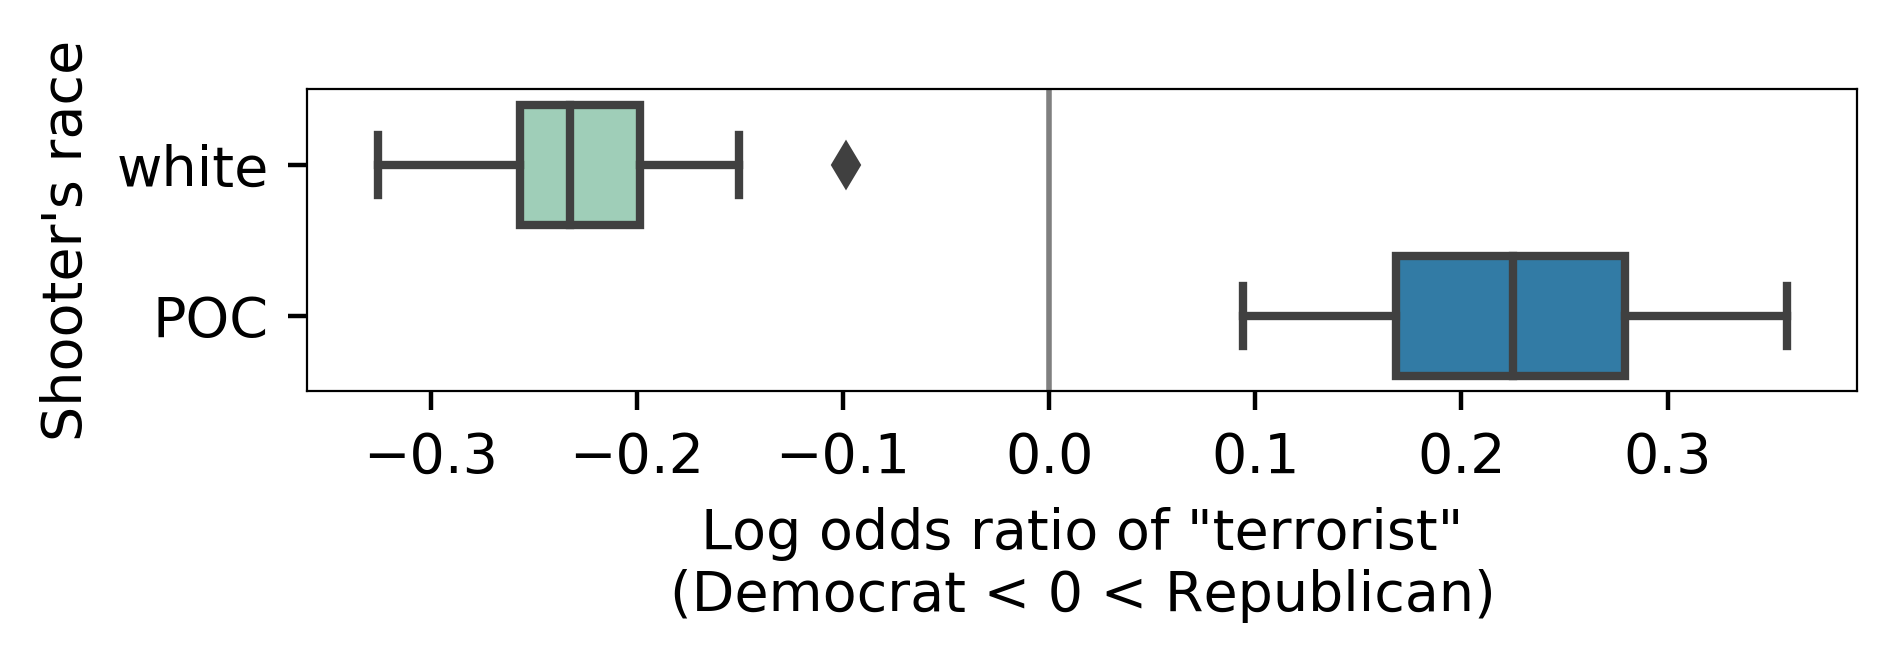

In [9]:
f = plt.figure(dpi=400, figsize=(5,1))
ax = sns.boxplot(data=df, x="log_odds",y='race', orient="h", palette=sns.color_palette("YlGnBu", 2))
ax.plot([0,0], [-1, 20], linewidth=1, color='grey')
ax.set_ylabel("Shooter's race")
ax.spines['top'].set_linewidth(0.4)
ax.spines['right'].set_linewidth(0.4)
ax.spines['bottom'].set_linewidth(0.4)
ax.spines['left'].set_linewidth(0.4)
ax.set_xlabel('Log odds ratio of "'+word+'"\n(Democrat < 0 < Republican)')